# Emoji Sentiment Analysis with Tweets
        
## step3-EDA & Basic models
### 3.1 data exploring
1. plot the most requent emoji

### 3.2 topic models
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTigQWzoYCNiDyrz1BN4WTf2X2k9OZ_yvW-FsmcIMsdS9fppNmh)


In [1]:
# ! git clone https://github.com/Liagogo/Twitter-Sentiment-Analysis-Emoji-Embedding-and-LSTM

In [2]:
# required libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter

plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [3]:
# emoji lists

joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surp = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojilist = {'joy':joy, 'anger':anger, 'disgust':disgust, 'fear':fear, 'sad':sad, 'surprise':surp}
for i in emojilist:
    print('There are {} emoji contains in the cluster {}'.format(len(emojilist[i]), i))
    print(i,emojilist[i])

There are 29 emoji contains in the cluster joy
joy ['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥']
There are 9 emoji contains in the cluster anger
anger ['😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾']
There are 1 emoji contains in the cluster disgust
disgust ['💩']
There are 7 emoji contains in the cluster fear
fear ['😅', '😦', '😧', '😱', '😨', '😰', '🙀']
There are 12 emoji contains in the cluster sad
sad ['😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔']
There are 4 emoji contains in the cluster surprise
surprise ['😳', '😯', '😵', '😲']


In [4]:
allemoji = allemoji = joy + anger + disgust + fear + sad + surp

In [5]:
##########
#3.1 Cleaned Data Exploring
#load the cleaned data
df = pd.read_csv('tweets_cleaned_drop.csv')

In [6]:
df[['tweets','stweets','emojis','c_emojis','type']]

,tweets,stweets,emojis,c_emojis,type
0,four goal for 😱,four goal for 😱,😱,😱,fear
1,kitten best spot 😅,kitten best spot 😅,😅,😅,fear
2,🙀 when cleaning window remember,🙀 when cleaning window remember,🙀,🙀,fear
3,diamond dragon field day making fun 😅,diamond dragon field day making fun 😅,😅,😅,fear
4,😅,😅,😅,😅,fear
...,...,...,...,...,...
160036,t 💩 talk,t 💩 talk,💩,💩,disgust
160037,you expect b 💩 😖 look 😡 black face,you expect b 💩 😖 look 😡 black face,💩 😖 😡,💩 😖 😡,disgust
160038,💩 never use crap,💩 never use crap,💩,💩,disgust
160039,what 💩,what 💩,💩,💩,disgust


In [7]:
#### all emojis frequencies
#get the emoji list
wordslist = []
for t in df['emojis']:
    t = t.split()
    wordslist += t

wordslist[:3]

['😱', '😅', '🙀']

In [114]:
x = np.array(wordslist)
uniquewordslist = np.unique(x)#all unique emojis shown in the dataset
#example
uniquewordslist[100]

'✨'

In [8]:
ls = []
count = Counter(wordslist)
allemoji = joy + anger + disgust + fear + sad + surp
for i in allemoji:
    x,y = i,count[i]
    ls.append([x,y])
# x,y = zip(*ls)
# x,y

ls = sorted(ls)
import pandas as pd
fredf = pd.DataFrame(ls,columns=['emoji','count'])
fredf.sort_values(by=['count'],ascending=False, inplace=True)
fredf[:11]

,emoji,count
14,😅,18363
47,😭,16664
52,😳,12275
8,💩,11905
38,😤,10791
11,😂,10028
46,😬,7550
24,😐,5985
53,😵,5235
50,😱,5063


In [9]:
fredf.to_csv('fre_emojis_en.csv')

findfont: Font family ['Euclid Fraktur'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/

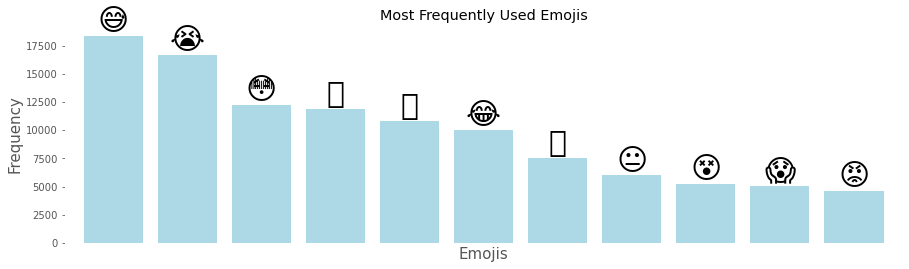

In [10]:
# draw the most frequently used emoji:
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/Library/Fonts/Euclid Fraktur.dfont')

freqs = fredf['count'][:11]
labels = fredf['emoji'][:11]
# Plot the figure
plt.figure(figsize=(15, 4))
plt.rcParams['font.family'] = prop.get_family()
# plt.grid(axis = 'x')
# plt.bar(labels,freqs,color='pink')
# plt.show()


ax = pd.Series(freqs).plot(kind='bar', color='lightblue', width=0.8)
ax.set_title('Most Frequently Used Emojis')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Emojis', fontsize=15)
ax.set_facecolor(color='white')
ax.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop.get_name()
    )

plt.show()

## 3.2 Topic model
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

In [11]:
######################
##########
# 3.2 Topic model with emojis
# prepare emoji list for topic model
emlist = [em.split() for em in df['emojis']]
emlist[:10]

[['😱'],
 ['😅'],
 ['🙀'],
 ['😅'],
 ['😅'],
 ['😅'],
 ['😱'],
 ['😮', '😮'],
 ['💙', '❤', '😅'],
 ['😅']]

In [12]:
# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=9)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 9.86 s, sys: 80.4 ms, total: 9.95 s
Wall time: 10 s
[(0, '0.574*"😳" + 0.091*"😡" + 0.089*"😐" + 0.048*"😍" + 0.020*"🤣" + 0.017*"😉" + 0.016*"👎" + 0.013*"💥" + 0.010*"😃" + 0.010*"🤝"'), (1, '0.378*"😂" + 0.169*"😬" + 0.133*"😩" + 0.083*"❤" + 0.031*"😎" + 0.027*"♂" + 0.019*"🏾" + 0.019*"🤡" + 0.015*"😀" + 0.013*"💜"'), (2, '0.873*"💩" + 0.022*"😖" + 0.010*"👀" + 0.008*"💖" + 0.007*"👻" + 0.007*"🐷" + 0.006*"🈂" + 0.006*"🙏" + 0.005*"🤔" + 0.004*"💯"'), (3, '0.241*"🚨" + 0.135*"🍄" + 0.117*"😢" + 0.073*"🍔" + 0.068*"🏻" + 0.067*"🥗" + 0.039*"🥺" + 0.036*"☑" + 0.018*"😰" + 0.014*"🐊"'), (4, '0.265*"😲" + 0.153*"😑" + 0.104*"😔" + 0.079*"😏" + 0.070*"🤯" + 0.059*"😌" + 0.023*"🎥" + 0.022*"💙" + 0.021*"♥" + 0.020*"👉"'), (5, '0.386*"😵" + 0.329*"💫" + 0.198*"😅" + 0.016*"✅" + 0.014*"😛" + 0.011*"🏽" + 0.011*"😇" + 0.006*"😜" + 0.003*"🤢" + 0.003*"⚡"'), (6, '0.266*"😤" + 0.173*"💔" + 0.081*"🍆" + 0.065*"😱" + 0.056*"👇" + 0.049*"🏆" + 0.036*"🌵" + 0.032*"💡" + 0.032*"👙" + 0.030*"🐐"'), (7, '0.748*"😭" + 0.052*"😠" + 0.047*"🔥" + 0.040*"🎁

In [13]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


CPU times: user 5.41 s, sys: 135 ms, total: 5.55 s
Wall time: 8.02 s


In [14]:
# get the top 10 emoji related with each topic
my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(9):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(my_dict[key])

Top 10 related emoji in Topic_0
['😳', '😡', '😐', '😍', '🤣', '😉', '👎', '💥', '😃', '🤝']
Top 10 related emoji in Topic_1
['😂', '😬', '😩', '❤', '😎', '♂', '🏾', '🤡', '😀', '💜']
Top 10 related emoji in Topic_2
['💩', '😖', '👀', '💖', '👻', '🐷', '🈂', '🙏', '🤔', '💯']
Top 10 related emoji in Topic_3
['🚨', '🍄', '😢', '🍔', '🏻', '🥗', '🥺', '☑', '😰', '🐊']
Top 10 related emoji in Topic_4
['😲', '😑', '😔', '😏', '🤯', '😌', '🎥', '💙', '♥', '👉']
Top 10 related emoji in Topic_5
['😵', '💫', '😅', '✅', '😛', '🏽', '😇', '😜', '🤢', '⚡']
Top 10 related emoji in Topic_6
['😤', '💔', '🍆', '😱', '👇', '🏆', '🌵', '💡', '👙', '🐐']
Top 10 related emoji in Topic_7
['😭', '😠', '🔥', '🎁', '💕', '😆', '🥴', '🌞', '🥳', '\U0001f972']
Top 10 related emoji in Topic_8
['🤦', '😯', '😊', '😁', '♀', '😕', '🌟', '😫', '🤷', '😘']


In [15]:
###
#only explore our concerned emojis

In [16]:
# prepare emoji list for topic model
cels = []
emlist = [em.split() for em in df['emojis']]
for i in emlist:
    e = []
    for emo in i:
        if emo in allemoji:
            e.append(emo)
    cels.append(e)
        
print(emlist[:10])
print(cels[:10])

[['😱'], ['😅'], ['🙀'], ['😅'], ['😅'], ['😅'], ['😱'], ['😮', '😮'], ['💙', '❤', '😅'], ['😅']]
[['😱'], ['😅'], ['🙀'], ['😅'], ['😅'], ['😅'], ['😱'], [], ['❤', '😅'], ['😅']]


In [17]:
emlist = cels

In [18]:

# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=6)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 8.83 s, sys: 51.8 ms, total: 8.88 s
Wall time: 8.94 s
[(0, '0.349*"😡" + 0.334*"😲" + 0.115*"😊" + 0.067*"😉" + 0.031*"😄" + 0.029*"😋" + 0.026*"♥" + 0.021*"😾" + 0.014*"😰" + 0.007*"😿"'), (1, '0.546*"😭" + 0.214*"😂" + 0.082*"😐" + 0.042*"😖" + 0.038*"😠" + 0.032*"😔" + 0.026*"💕" + 0.018*"😌" + 0.002*"😦" + 0.000*"😺"'), (2, '0.929*"💩" + 0.025*"😍" + 0.014*"😱" + 0.009*"😆" + 0.005*"😃" + 0.005*"😀" + 0.003*"🌞" + 0.003*"😹" + 0.003*"😓" + 0.002*"☺"'), (3, '0.298*"😤" + 0.277*"😬" + 0.194*"💔" + 0.069*"😏" + 0.064*"😁" + 0.047*"💖" + 0.028*"😘" + 0.016*"☹" + 0.007*"😧" + 0.000*"😝"'), (4, '0.504*"😳" + 0.276*"😵" + 0.141*"😅" + 0.021*"😢" + 0.017*"😎" + 0.012*"😕" + 0.010*"😫" + 0.010*"😛" + 0.008*"😇" + 0.000*"😱"'), (5, '0.328*"😩" + 0.204*"❤" + 0.203*"😑" + 0.132*"😯" + 0.030*"😪" + 0.024*"😥" + 0.021*"😻" + 0.021*"😜" + 0.019*"😨" + 0.015*"😝"')]
[(0, 0.08333412), (1, 0.0833341), (2, 0.58332944), (3, 0.08333411), (4, 0.0833341), (5, 0.08333412)]


In [19]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

CPU times: user 5.37 s, sys: 59.8 ms, total: 5.43 s
Wall time: 5.65 s


In [20]:
# get the top 10 emoji related with each topic
my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(6):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(my_dict[key])

Top 10 related emoji in Topic_0
['😡', '😲', '😊', '😉', '😄', '😋', '♥', '😾', '😰', '😿']
Top 10 related emoji in Topic_1
['😭', '😂', '😐', '😖', '😠', '😔', '💕', '😌', '😦', '😺']
Top 10 related emoji in Topic_2
['💩', '😍', '😱', '😆', '😃', '😀', '🌞', '😹', '😓', '☺']
Top 10 related emoji in Topic_3
['😤', '😬', '💔', '😏', '😁', '💖', '😘', '☹', '😧', '😝']
Top 10 related emoji in Topic_4
['😳', '😵', '😅', '😢', '😎', '😕', '😫', '😛', '😇', '😱']
Top 10 related emoji in Topic_5
['😩', '❤', '😑', '😯', '😪', '😥', '😻', '😜', '😨', '😝']


In [21]:
# e-LDA
# select stable topics
from gensim.models import EnsembleLda
emlist = cels
# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

# Ensemble LDA model
elda = EnsembleLda(corpus=corpus, id2word=vocabs, num_topics=12, num_models=3)

In [22]:
elda.print_topics()

[(0,
  '0.763*"😭" + 0.098*"😐" + 0.035*"💩" + 0.030*"😅" + 0.021*"😘" + 0.012*"😵" + 0.010*"😕" + 0.004*"🙀" + 0.003*"😳" + 0.003*"😲"'),
 (1,
  '0.679*"💩" + 0.113*"😬" + 0.034*"💔" + 0.027*"😎" + 0.025*"😯" + 0.019*"😁" + 0.010*"😃" + 0.009*"😀" + 0.008*"😕" + 0.008*"😇"'),
 (2,
  '0.702*"😅" + 0.113*"😲" + 0.078*"😁" + 0.040*"😋" + 0.016*"💩" + 0.010*"☺" + 0.007*"😊" + 0.006*"😐" + 0.005*"❤" + 0.005*"💔"'),
 (3,
  '0.455*"😵" + 0.180*"❤" + 0.067*"😊" + 0.061*"😁" + 0.037*"😌" + 0.028*"😋" + 0.024*"😰" + 0.020*"♥" + 0.018*"🙀" + 0.016*"😅"'),
 (4,
  '0.633*"😳" + 0.276*"😱" + 0.024*"😫" + 0.012*"😲" + 0.007*"❤" + 0.007*"😐" + 0.007*"😦" + 0.006*"😍" + 0.003*"😩" + 0.003*"😂"'),
 (5,
  '0.698*"😂" + 0.045*"😤" + 0.034*"😆" + 0.024*"😅" + 0.021*"💩" + 0.021*"❤" + 0.019*"😳" + 0.018*"😛" + 0.016*"😫" + 0.015*"😖"')]

In [23]:
import re
k = 1
for i,j in elda.print_topics():
    x = re.findall(r'"(.*?)"', str(j))
    z = ' '.join(x)
    print('Topic{}'.format(k),z)
    k += 1

Topic1 😭 😐 💩 😅 😘 😵 😕 🙀 😳 😲
Topic2 💩 😬 💔 😎 😯 😁 😃 😀 😕 😇
Topic3 😅 😲 😁 😋 💩 ☺ 😊 😐 ❤ 💔
Topic4 😵 ❤ 😊 😁 😌 😋 😰 ♥ 🙀 😅
Topic5 😳 😱 😫 😲 ❤ 😐 😦 😍 😩 😂
Topic6 😂 😤 😆 😅 💩 ❤ 😳 😛 😫 😖


### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

#### 3.3.1 Word embedding model with only emojis

(1) All emojis

In [47]:
# 3.3.1 
####
# all emojis
emlist = [em.split() for em in df['emojis']]
emlist[:3]

[['😱'], ['😅'], ['🙀']]

In [25]:
posit = (['😂', '😅'],['😅', '👍'],['🙃', '😅'],['💩', '😡'],['😀','👏'],['🎉','😆'],['😘', '♥'])
negat = (['😅', '👍'],['💋', '♥'],['😘', '♥'])

In [64]:
from gensim.models import Word2Vec
#*************reported*********
# set model parameters
num_features = 60    # Word vector dimensionality, tested 10 to 100                 
min_word_count = 50    # Minimum word count, tested 10 to 100                     
context = 5           # Context window size tested 1 to 20
sg = 0                # skipgram=1, cbow=0  ###cbow shows more intuitive results, tested 0,1

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 1.05 s, sys: 18.9 ms, total: 1.07 s
Wall time: 833 ms


In [65]:
list = allemoji
#*************reported*********
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i))
    print('\n')

the most similar words to 😀 are:
[('😔', 0.9639090299606323), ('😴', 0.9568080902099609), ('😢', 0.9542660117149353), ('😊', 0.9539339542388916), ('\U0001f972', 0.951956033706665), ('😃', 0.9491305351257324), ('🌸', 0.9475567936897278), ('💔', 0.9466917514801025), ('🙃', 0.9454399347305298), ('🤗', 0.9435644745826721)]


the most similar words to 😂 are:
[('🙃', 0.9093263149261475), ('😷', 0.9078518748283386), ('😥', 0.9072569012641907), ('🍆', 0.9058714509010315), ('🤪', 0.905698835849762), ('✌', 0.9045831561088562), ('🎧', 0.9043862223625183), ('😕', 0.9043211936950684), ('😫', 0.9022624492645264), ('🤏', 0.9015452265739441)]


the most similar words to 😃 are:
[('🤍', 0.9776960015296936), ('☀', 0.9767275452613831), ('😝', 0.9731354117393494), ('🖤', 0.9707190990447998), ('😯', 0.9676194787025452), ('🤪', 0.9675005674362183), ('😓', 0.967156171798706), ('💌', 0.964902937412262), ('\U0001f972', 0.9640669822692871), ('🌸', 0.9640640616416931)]


the most similar words to 😄 are:
[('🙈', 0.9707797765731812), ('😌', 0

In [66]:
# analog task
#*************reported*********
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[:3])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[:3])
    print()

😂+😅=?
[('😕', 0.9005497097969055), ('🎥', 0.9004135131835938), ('🙃', 0.900109052658081)]

😅+👍=?
[('👩', 0.9285414814949036), ('🎥', 0.9148514866828918), ('😕', 0.9142671823501587)]

🙃+😅=?
[('🎥', 0.9316010475158691), ('\U0001f979', 0.9258182644844055), ('😕', 0.9162966012954712)]

💩+😡=?
[('🤡', 0.9027008414268494), ('🤮', 0.8982716202735901), ('🖤', 0.8902335166931152)]

😀+👏=?
[('👌', 0.9440706968307495), ('🙌', 0.942542552947998), ('✌', 0.9327102303504944)]

🎉+😆=?
[('💗', 0.9386307597160339), ('📌', 0.9175744652748108), ('🌞', 0.9108761548995972)]

😘+♥=?
[('💖', 0.8772141933441162), ('😿', 0.859786868095398), ('👉', 0.8568821549415588)]

😅-👍=?
[('🏆', -0.1159989982843399), ('💵', -0.13717930018901825), ('🎁', -0.17720423638820648)]

💋-♥=?
[('😒', -0.12725523114204407), ('😠', -0.18658210337162018), ('👀', -0.2308611124753952)]

😘-♥=?
[('😒', -0.040415506809949875), ('😭', -0.11593548208475113), ('🤦', -0.1381029486656189)]



In [67]:
# only print answers
for i in posit:
    print(model_emoall.wv.most_similar(positive=i)[:3][:3])
    print()
print('----')
for i in negat:
    print(model_emoall.wv.most_similar(negative=i)[:3][:3])
    print()

[('😕', 0.9005497097969055), ('🎥', 0.9004135131835938), ('🙃', 0.900109052658081)]

[('👩', 0.9285414814949036), ('🎥', 0.9148514866828918), ('😕', 0.9142671823501587)]

[('🎥', 0.9316010475158691), ('\U0001f979', 0.9258182644844055), ('😕', 0.9162966012954712)]

[('🤡', 0.9027008414268494), ('🤮', 0.8982716202735901), ('🖤', 0.8902335166931152)]

[('👌', 0.9440706968307495), ('🙌', 0.942542552947998), ('✌', 0.9327102303504944)]

[('💗', 0.9386307597160339), ('📌', 0.9175744652748108), ('🌞', 0.9108761548995972)]

[('💖', 0.8772141933441162), ('😿', 0.859786868095398), ('👉', 0.8568821549415588)]

----
[('🏆', -0.1159989982843399), ('💵', -0.13717930018901825), ('🎁', -0.17720423638820648)]

[('😒', -0.12725523114204407), ('😠', -0.18658210337162018), ('👀', -0.2308611124753952)]

[('😒', -0.040415506809949875), ('😭', -0.11593548208475113), ('🤦', -0.1381029486656189)]



***(2) only concerned emojis***

In [30]:
#####
# only concerned emojis
emlist2 = cels

In [31]:

from gensim.models import Word2Vec
# set model parameters
num_features =30    # Word vector dimensionality                  
min_word_count = 5    # Minimum word count                     
context = 15           # Context window size 
sg = 0                # skipgram=1, cbow=0  


# train the model
%time model_emo = Word2Vec(emlist2, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 1.13 s, sys: 75.2 ms, total: 1.2 s
Wall time: 741 ms


In [32]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emo.wv.most_similar(i)[:3])
    print('\n')

the most similar words to 😀 are:
[('😺', 0.9968054294586182), ('🌞', 0.9964253902435303), ('☺', 0.9958642721176147)]


the most similar words to 😂 are:
[('😋', 0.990347683429718), ('😘', 0.9894802570343018), ('😫', 0.9891095161437988)]


the most similar words to 😃 are:
[('😏', 0.9956873059272766), ('🌞', 0.9952285885810852), ('💖', 0.994570255279541)]


the most similar words to 😄 are:
[('😺', 0.9937685132026672), ('😀', 0.9931699633598328), ('😍', 0.9923492074012756)]


the most similar words to 😆 are:
[('😜', 0.9941705465316772), ('🙀', 0.9939000606536865), ('😪', 0.9936854243278503)]


the most similar words to 😇 are:
[('😋', 0.9959006905555725), ('😘', 0.9945448040962219), ('🙀', 0.9932019114494324)]


the most similar words to 😉 are:
[('😋', 0.9939075112342834), ('😨', 0.9926196336746216), ('😢', 0.9925419092178345)]


the most similar words to 😊 are:
[('😁', 0.9955255389213562), ('😘', 0.9932126998901367), ('😯', 0.9929253458976746)]


the most similar words to 😋 are:
[('😇', 0.9959006905555725), ('😘',

In [33]:
# have fun
# not very satisfying
for i in (['😂', '😅'],['😅', '💖'],['😠', '😅'],['😘', '💔'],['😘', '♥']):
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emo.wv.most_similar(positive=i)[:3])
    print()

for i in (['😅', '😡'],['😍', '💖']):
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emo.wv.most_similar(negative=i)[:3])
    print()

😂+😅=?
[('😊', 0.9926360845565796), ('😁', 0.9900388121604919), ('😯', 0.9898461699485779)]

😅+💖=?
[('😊', 0.9957327842712402), ('😁', 0.9928048849105835), ('😯', 0.9913066625595093)]

😠+😅=?
[('😁', 0.9755220413208008), ('😘', 0.9729861617088318), ('😊', 0.9722248315811157)]

😘+💔=?
[('😋', 0.9967381954193115), ('😌', 0.9966012239456177), ('😺', 0.9965318441390991)]

😘+♥=?
[('😺', 0.9976208209991455), ('🙀', 0.9976040720939636), ('💖', 0.9972294569015503)]

😅-😡=?
[('😭', -0.5184286832809448), ('😠', -0.8468021750450134), ('😦', -0.9233402609825134)]

😍-💖=?
[('😭', -0.5392251014709473), ('😠', -0.8786246180534363), ('😦', -0.9275326728820801)]



***(3). emojis+text***

In [34]:
##################
# 3.3.2 Word embedding model with emojis&text

In [68]:
# emojis+tweets
emlist = [em.split() for em in df['stweets']]
emlist[:3]

[['four', 'goal', 'for', '😱'],
 ['kitten', 'best', 'spot', '😅'],
 ['🙀', 'when', 'cleaning', 'window', 'remember']]

In [69]:
from gensim.models import Word2Vec
#*************reported*********
# set model parameters
num_features = 300    # Word vector dimensionality                  
min_word_count = 20    # Minimum word count-Ignores all words with total frequency lower than this                     
context = 15           # Context window size 
sg = 3                # skipgram=3, cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)
# this set of parameters is good

CPU times: user 29.9 s, sys: 208 ms, total: 30.1 s
Wall time: 10.4 s


In [73]:
## save the model
# you can save the trained model for future use
model_emotext.save("en_word2vec_skipgram_300.model")#后续可以直接加载不用重新学

# you can load saved model later as follows:
# model_w2v = Word2Vec.load("en_word2vec_skipgram_300.model")

In [76]:
# save all word embeddings
all_word_vectors = model_emotext.wv.vectors
print(type(all_word_vectors))
print(all_word_vectors.shape) # num_words * num_features

<class 'numpy.ndarray'>
(3822, 300)


In [77]:
all_word_vectors

array([[-0.00416088, -0.09457464, -0.16829626, ..., -0.0576079 ,
         0.09457128, -0.07616308],
       [-0.01286467,  0.3750699 , -0.4626135 , ..., -0.2545819 ,
         0.16998774,  0.20071258],
       [-0.07549231,  0.23212278, -0.09303179, ..., -0.24786706,
         0.0222209 , -0.2376131 ],
       ...,
       [-0.12286567,  0.16594136, -0.1520286 , ..., -0.01771932,
         0.07463954, -0.2036157 ],
       [ 0.13362044,  0.20956935, -0.1594106 , ..., -0.1938618 ,
        -0.03691782, -0.13522695],
       [-0.08569058,  0.12440969, -0.07074789, ...,  0.01813804,
         0.05916281, -0.09018522]], dtype=float32)

In [80]:
from gensim.models import KeyedVectors
# Store just the words + their trained embeddings.
word_vectors = model_emotext.wv
word_vectors.save("en_word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("en_word2vec.wordvectors", mmap='r')
vector = wv['sun']  # Get numpy vector of a word
print(vector)

[ 0.00280417 -0.16945766 -0.23913933 -0.2036799   0.04361298 -0.1166352
 -0.30567107  0.3788157   0.20842427  0.30452392  0.13420278 -0.00123327
  0.1862885  -0.26416492 -0.35838127 -0.26563758  0.03900193 -0.08507174
  0.2884564   0.2925888   0.0857296   0.37365618  0.14253297 -0.15266569
  0.20913538  0.01812515 -0.05771454 -0.11217214  0.31824508 -0.41946712
 -0.23888108 -0.0550358   0.07419591 -0.00573222  0.3070314   0.1189172
 -0.11551636 -0.06710469 -0.10007353 -0.12544167 -0.35524997  0.13920741
 -0.18302159 -0.10307162 -0.29216382 -0.0873626  -0.3546401  -0.18673636
  0.13476792 -0.19150577 -0.05601427 -0.31042498  0.17859107  0.068088
  0.23424114  0.16421276 -0.3286926   0.01113946  0.06519688 -0.01871348
  0.06036448  0.0209165  -0.2137702   0.14491569 -0.10729026  0.14352891
  0.1421684  -0.20910202  0.1056067  -0.05273742  0.02010006  0.10081599
  0.02347174 -0.24561885 -0.06429109  0.44633847  0.18329221 -0.01717712
  0.2049227  -0.24589454 -0.5580645   0.0031181  -0.094

In [70]:
#*************reported*********
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i,topn=30))
    print('\n')

the most similar words to 😀 are:
[('cheer', 0.5546852946281433), ('respond', 0.49761828780174255), ('cried', 0.4956645369529724), ('🎂', 0.48121052980422974), ('😿', 0.47872641682624817), ('choosing', 0.47864973545074463), ('visiting', 0.4779030680656433), ('meaning', 0.4760286808013916), ('wishing', 0.4753781855106354), ('mission', 0.46778589487075806), ('hanging', 0.46761101484298706), ('ache', 0.466816246509552), ('kay', 0.4643493592739105), ('apply', 0.4546792805194855), ('grateful', 0.4539129137992859), ('maam', 0.45031845569610596), ('din', 0.4476624131202698), ('brilliant', 0.445770800113678), ('healthy', 0.44405388832092285), ('present', 0.4412766993045807), ('pig', 0.4402521848678589), ('blessed', 0.4396519958972931), ('happiest', 0.43813443183898926), ('deadline', 0.4365059733390808), ('mobile', 0.4364016354084015), ('sweetie', 0.4329889714717865), ('rant', 0.43181952834129333), ('humble', 0.42987149953842163), ('odd', 0.4293482303619385), ('doc', 0.4293212890625)]


the most s

In [116]:
# save the most similar words of all unique emojis
import emoji

dic = {}
for i in uniquewordslist:
    try:
        ls = []
        count = 0
        simils = model_emotext.wv.most_similar(i,topn=100)
        for simi in simils:
            count += 1
            (k,v) = simi
            if k not in emoji.UNICODE_EMOJI['en'] and len(ls)<5:
                ls.append(k)# the first 5 text tokens for each concerned emoji
        emotext = " ".join(ls)
        dic[i] = dic.get(i,emotext)
    except:
        continue

print(dic)


{'©': 'mail prince ladder cutie momo', '‼': 'bossy treatment dreamy urgent announcement', '⁉': 'predraft ser miserable spree ake', '↗': 'status silver elite diamond rookie', '↘': 'status silver elite noodle diamond', '⏩': 'massively gain para pin bounce', '⏰': 'gulf holder sol tutorial meta', '⏱': 'overall diameter prevote search mission', '⏲': 'flash pinned sol prize included', '▪': 'palace striker arsenal unhappy loan', '▶': 'oral masturbator vacuum suction electric', '☀': 'sunshine wishing sunny maam afternoon', '☁': 'silver really veiny labor pinned', '☄': 'hazardous diameter object approach potentially', '☑': 'prize limited al sol flash', '☕': 'carat coffee allergic intelligent grow', '☝': 'kicking jail would unfair heat', '☠': 'labor elite shopping fa veiny', '☹': 'related opening bet audio dey', '☺': 'sweetie replay reflection wishing relief', '♀': 'labor alcohol battery written miserable', '♂': 'miserable riding fee alcohol labor', '♥': 'more reflection bikini detail magazine',

In [118]:
df_name = pd.DataFrame.from_dict(dic,orient='index')
df_name

,0
©,mail prince ladder cutie momo
‼,bossy treatment dreamy urgent announcement
⁉,predraft ser miserable spree ake
↗,status silver elite diamond rookie
↘,status silver elite noodle diamond
...,...
🩸,rifle assault bin catwalk platinum
🩹,scratch tae knee fell attached
🫠,shaking titty kissing heel hop
🫣,titty prefer typo struggling confirm


In [171]:
df_name.to_csv("en_most_similar_names.csv")

In [71]:
#*************reported*********
# have fun
# not very satisfying
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i)[:10])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i)[:10])
    print()

😂+😅=?
[('typo', 0.4682105481624603), ('luckily', 0.4628780782222748), ('highly', 0.4569580852985382), ('bell', 0.4450664222240448), ('joint', 0.4446306526660919), ('odd', 0.43908923864364624), ('😧', 0.4387381672859192), ('revenge', 0.43784451484680176), ('figured', 0.43681883811950684), ('dislike', 0.4313182830810547)]

😅+👍=?
[('🤞', 0.5782660245895386), ('anyway', 0.5598163604736328), ('🐊', 0.5256295204162598), ('👎', 0.5129972100257874), ('constant', 0.5104743838310242), ('randy', 0.5010728240013123), ('mate', 0.5005717873573303), ('ser', 0.5005261301994324), ('progress', 0.4931688606739044), ('sacrifice', 0.4913994371891022)]

🙃+😅=?
[('bell', 0.6108229160308838), ('bread', 0.5794050097465515), ('sweating', 0.5774669051170349), ('purchase', 0.5773180723190308), ('instantly', 0.5757140517234802), ('joint', 0.5669885277748108), ('embarrassed', 0.5651310682296753), ('uncomfortable', 0.5582519173622131), ('blunt', 0.5535018444061279), ('drank', 0.5516579747200012)]

💩+😡=?
[('amendment', 0.

In [40]:
####
## cbow
# cbow 在英文有文字的情况下效果不是很好
from gensim.models import Word2Vec
# set model parameters
num_features = 300    # Word vector dimensionality                  
min_word_count = 50    # Minimum word count-Ignores all words with total frequency lower than this                     
context = 20           # Context window size 
sg = 0                # skipgram=3, cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 9.58 s, sys: 179 ms, total: 9.76 s
Wall time: 3.44 s


In [41]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i,topn=20))
    print('\n')


the most similar words to 😀 are:
[('😃', 0.7726820707321167), ('😁', 0.730884850025177), ('😊', 0.696911633014679), ('😌', 0.6713787317276001), ('💚', 0.6688838005065918), ('🖤', 0.6274538636207581), ('🌸', 0.6257389187812805), ('👋', 0.6113176345825195), ('🌞', 0.6108642816543579), ('😄', 0.6069667935371399), ('🥰', 0.5969823598861694), ('😘', 0.5854864120483398), ('💕', 0.5853308439254761), ('💖', 0.5828853249549866), ('🤍', 0.5690395832061768), ('🥳', 0.5671989321708679), ('have', 0.563209593296051), ('wonderful', 0.5592061877250671), ('😿', 0.5524837970733643), ('😎', 0.5431486964225769)]


the most similar words to 😂 are:
[('😑', 0.7078260183334351), ('😐', 0.6877672672271729), ('😬', 0.6877273321151733), ('😅', 0.6717079281806946), ('😤', 0.6624924540519714), ('😹', 0.633270263671875), ('😧', 0.5831648111343384), ('😭', 0.5793938040733337), ('😎', 0.5561797022819519), ('dude', 0.5311084389686584), ('😆', 0.5298045873641968), ('😖', 0.5188586115837097), ('😔', 0.5078416466712952), ('😳', 0.5056500434875488), ('

In [42]:
# have fun
# not very satisfying
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i))
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i))
    print()

😂+😅=?
[('😑', 0.7145896553993225), ('😬', 0.7142571806907654), ('😐', 0.6983481645584106), ('😧', 0.6831939220428467), ('😤', 0.659505307674408), ('😭', 0.6538698077201843), ('😔', 0.6437270045280457), ('😹', 0.6382482647895813), ('😩', 0.6156056523323059), ('😎', 0.5932853817939758)]

😅+👍=?
[('😸', 0.5959275960922241), ('💪', 0.5770099759101868), ('😿', 0.558606743812561), ('😓', 0.5535069704055786), ('😀', 0.5458164215087891), ('🏼', 0.5440310835838318), ('😉', 0.541107177734375), ('😁', 0.5403456687927246), ('😎', 0.5399681329727173), ('😊', 0.5267660021781921)]

🙃+😅=?
[('writing', 0.6291866898536682), ('able', 0.6209343075752258), ('😂', 0.5997369885444641), ('worried', 0.5975121855735779), ('bout', 0.5811681747436523), ('smoke', 0.565111517906189), ('hearing', 0.560655951499939), ('drunk', 0.5568819642066956), ('bottle', 0.5535216927528381), ('wine', 0.5502669811248779)]

💩+😡=?
[('😑', 0.6303714513778687), ('🙄', 0.6092275381088257), ('🤡', 0.5671628713607788), ('😐', 0.5657738447189331), ('republican', 0

***emojis+text Visualization***

In [158]:
# visualization
keys = ['😀','😘','😡','😂','😅']
# keys = allemoji
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    try:
        for similar_word, _ in model_emotext.wv.most_similar(word, topn=50):
            if similar_word not in emoji.UNICODE_EMOJI['en'] and len(words)<15:
                words.append(similar_word)# most similar 10 text tokens
                embeddings.append(model_emotext.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
    except:
        continue


In [159]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

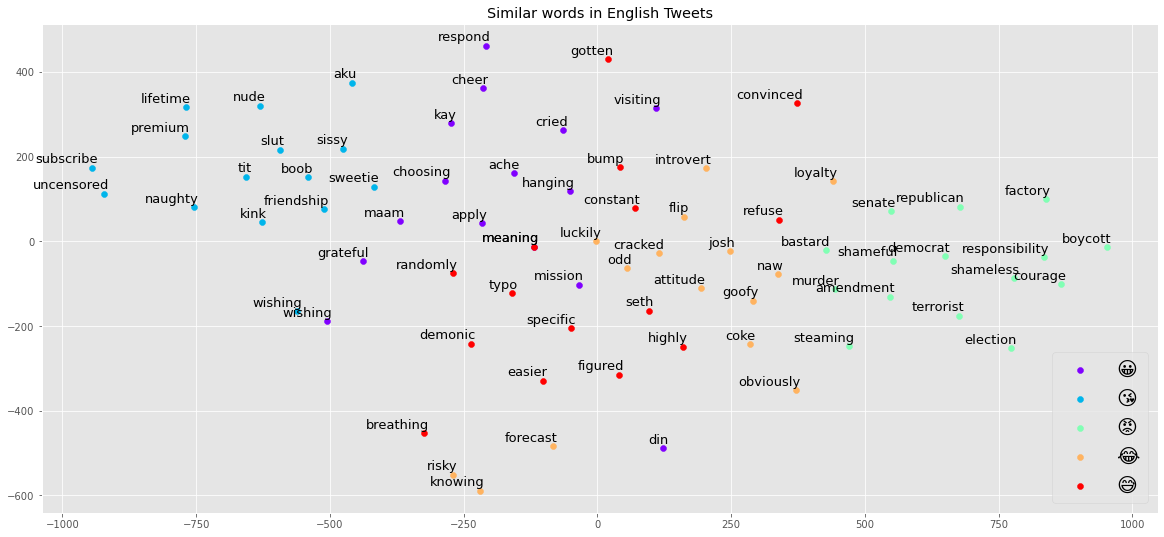

In [170]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #ignore the warning
plt.rcParams['font.family'] = prop.get_family()

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=1, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=13)
    plt.legend(loc=4,prop={'size': 20})
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words in English Tweets', keys, embeddings_en_2d, word_clusters, 1,
                        'similar_words.png')